In [1]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
 
sys.path.append('../')

from functions import *

data = pd.read_csv("../../data/demeaned.csv")

/Users/liumukun/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [59]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams.update(matplotlib.rcParamsDefault)
plt.style.use('tableau-colorblind10')
plt.rcParams['figure.figsize'] = (8,4)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['axes.titlepad'] = 10
plt.rcParams['axes.labelpad'] = 5
plt.rcParams['font.family'] = 'serif'
plt.rcParams['axes.facecolor'] = 'white'

In [43]:
from statsmodels.distributions.empirical_distribution import ECDF

samsung_o = ECDF(data[data.samsung == 1].bids)
apple_o = ECDF(data[data.apple == 1].bids)
amazon_o = ECDF(data[data.amazon == 1].bids)
others_o = ECDF(data[data.others == 1].bids)

In [41]:
from statsmodels.distributions.empirical_distribution import ECDF

samsung = ECDF(data[data.samsung == 1].residual)
apple = ECDF(data[data.apple == 1].residual)
amazon = ECDF(data[data.amazon == 1].residual)
others = ECDF(data[data.others == 1].residual)

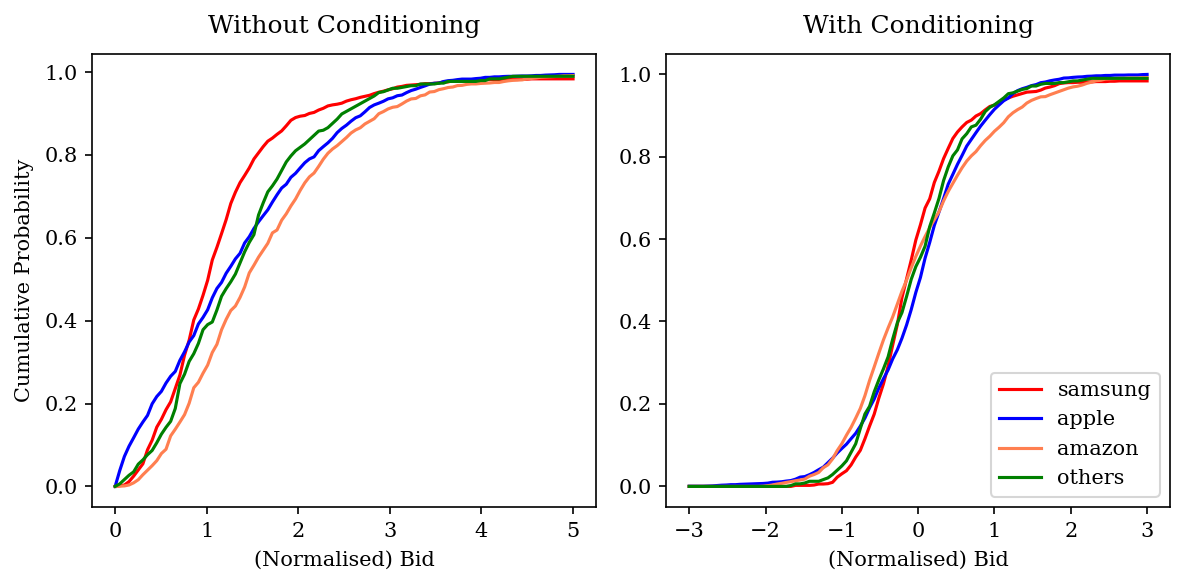

In [60]:
values1 = np.linspace(0, 5, num=100)

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(values1, samsung_o(values1), label="samsung", color="red")
ax1.plot(values1, apple_o(values1), label="apple", color="blue")
ax1.plot(values1, amazon_o(values1), label="amazon", color="coral")
ax1.plot(values1, others_o(values1), label="others", color="green")

ax1.set_xlabel("(Normalised) Bid")
ax1.set_ylabel("Cumulative Probability")
ax1.set_title("Without Conditioning")


values2 = np.linspace(-3, 3, num=100)

ax2.plot(values2, samsung(values2), label="samsung", color="red")
ax2.plot(values2, apple(values2), label="apple", color="blue")
ax2.plot(values2, amazon(values2), label="amazon", color="coral")
ax2.plot(values2, others(values2), label="others", color="green")

ax2.set_xlabel("(Normalised) Bid")
ax2.set_title("With Conditioning")

plt.legend(loc="lower right")

plt.tight_layout()

fig.savefig("ECDF.png", dpi=fig.dpi, bbox_inches="tight")